In [66]:
import pandas as pd 
import numpy as np
df=pd.read_csv("C:\\Users\\Fadi\\Downloads\\titanic.csv", delimiter= ";", encoding= "ISO-8859-1")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [67]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
df.info()
df.describe()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [69]:
#DataCleaning

df= df.dropna(subset = ['Embarked'])
df['Age'].fillna(df['Age'].median(), inplace=True)

In [70]:
#Categorical Data Fillna

number_of_elements= len(df['Cabin'])
print("Number of elements: ", number_of_elements)
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6', inplace=True)

Number of elements:  889
G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F2             3
              ..
C46            1
A31            1
C128           1
C30            1
E63            1
Name: Cabin, Length: 146, dtype: int64


In [71]:
#Verification that the data is ready to be treated:

df.isnull().sum().sum()

0

<AxesSubplot:>

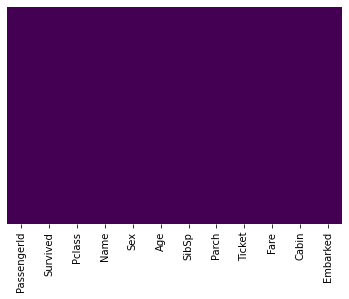

In [72]:
#NaN Heatmap

sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')

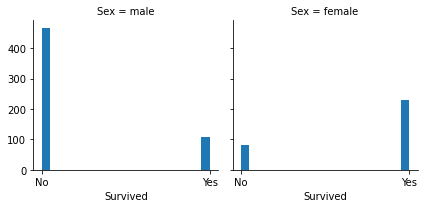

In [75]:
#Data Visualization Phase

import seaborn as sns
import matplotlib.pyplot as plt

g=sns.FacetGrid(df, col= "Sex")
g.map(plt.hist,"Survived", bins=20)

<AxesSubplot:xlabel='Survived', ylabel='count'>

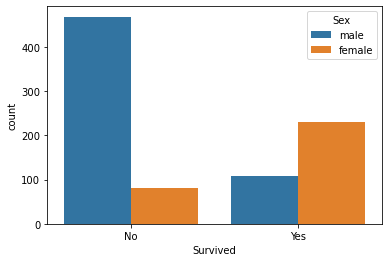

In [76]:
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

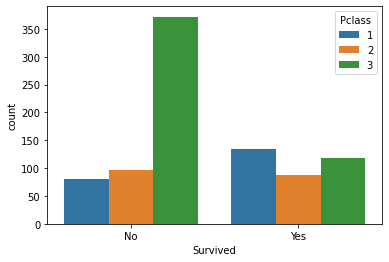

In [77]:
sns.countplot(x='Survived', hue='Pclass', data=df)

C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


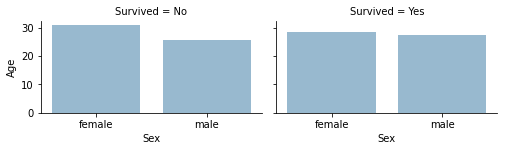

In [78]:
grid = sns.FacetGrid(df, col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Sex", "Age", alpha=.5, ci=None)
grid.add_legend()

C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Fadi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


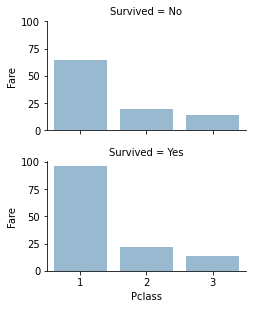

In [79]:
#The impact of Pclass and Fare features on Surviving

grid = sns.FacetGrid(df,"Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Pclass","Fare", alpha=.5, ci=None)
grid.add_legend()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

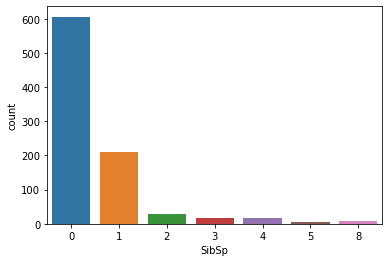

In [80]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:>

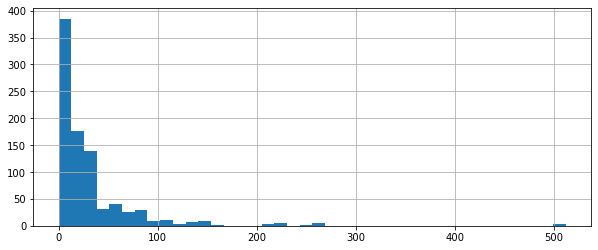

In [81]:
df['Fare'].hist(bins=40, figsize=(10, 4))

In [82]:
print(df.corr())

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035330  0.031319 -0.057686 -0.001657  0.012703
Pclass         -0.035330  1.000000 -0.336512  0.081656  0.016824 -0.548193
Age             0.031319 -0.336512  1.000000 -0.232543 -0.171485  0.093707
SibSp          -0.057686  0.081656 -0.232543  1.000000  0.414542  0.160887
Parch          -0.001657  0.016824 -0.171485  0.414542  1.000000  0.217532
Fare            0.012703 -0.548193  0.093707  0.160887  0.217532  1.000000


<AxesSubplot:>

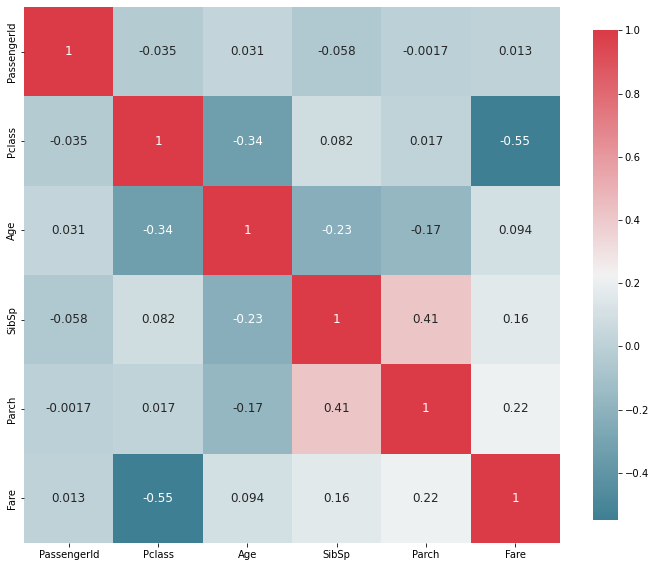

In [83]:
#The map represents the correlation between features (The Pearson's Correlation).
#The diagonal is dark red, with the value=1, because those squares coreelates the one feature to itself.
#The rest squares are lighter colors because they lesser than 1 or -1 (value of perfect correlation).
#So, it tells us how strong is the correlation between features.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_correlation_map(df):
    corr = df.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(df.corr(), cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })


In [84]:
##Data Preprocessing 

#preparing data for logistic regression

df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [86]:
df["Sex"]=df["Sex"].map({"male": 1, "female": 0})   #convert admitted variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [90]:
#Pclass, sibso, Parch, Fare

#import relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction

x = df[['Pclass', 'Sex', 'Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data

LogisticRegression()

In [92]:
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


In [95]:
###Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       137
           1       0.82      0.70      0.75        86

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

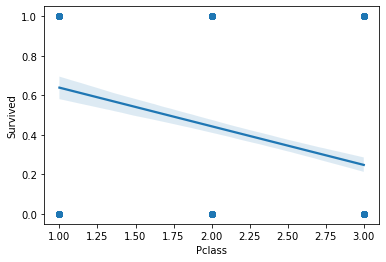

In [50]:
import seaborn as sns

sns.regplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

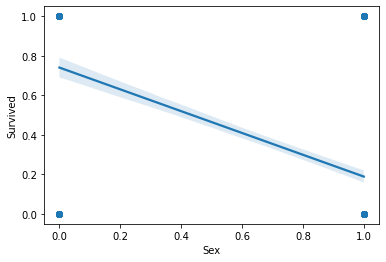

In [51]:
import seaborn as sns

sns.regplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

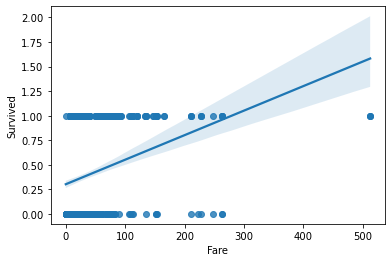

In [53]:
import seaborn as sns

sns.regplot(x='Fare',y='Survived',data=df)